In [84]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [67]:
input_dir='/content/drive/MyDrive/Data/ColorClassification'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        os.path.join(dirname, filename)

In [68]:
CATEGORIES = ['orange','Violet','red','Blue','Green','Black','Brown','White']
IMG_SIZE=100

/content/drive/MyDrive/Data/ColorClassification/orange/5.jpg


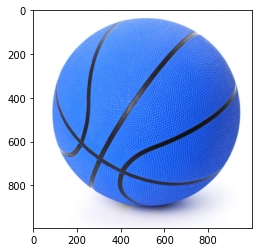

/content/drive/MyDrive/Data/ColorClassification/Violet/2.jpg


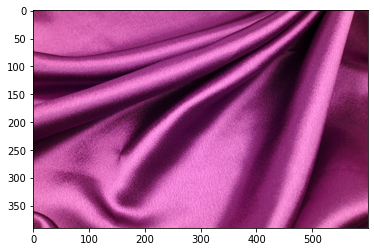

/content/drive/MyDrive/Data/ColorClassification/red/1.jpg


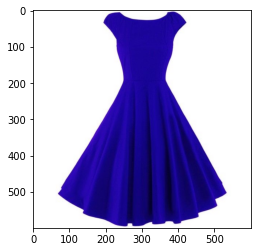

/content/drive/MyDrive/Data/ColorClassification/Blue/3.jpg


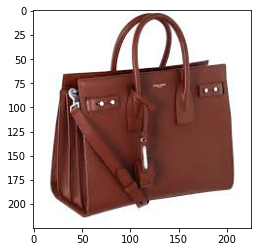

/content/drive/MyDrive/Data/ColorClassification/Green/7.jpg


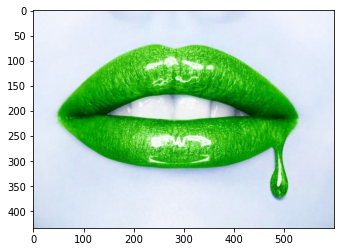

/content/drive/MyDrive/Data/ColorClassification/Black/1.jpg


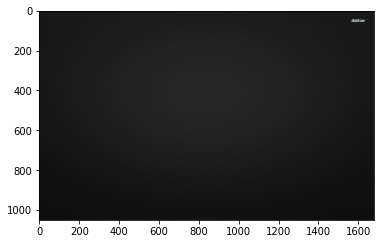

/content/drive/MyDrive/Data/ColorClassification/Brown/17.jpg


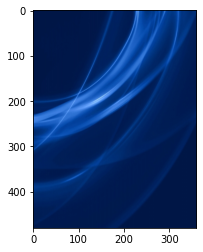

/content/drive/MyDrive/Data/ColorClassification/White/8.jpg


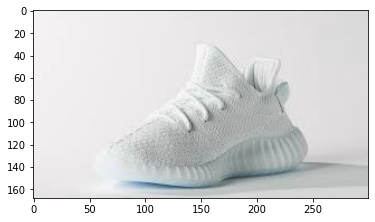

In [69]:
for category in CATEGORIES:
  path=os.path.join(input_dir,category)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
    plt.imshow(img_array)
    print(os.path.join(path,img))
    plt.show()
    break

In [70]:
training_data=[]
def create_training_data():
  for category in CATEGORIES:
    path=os.path.join(input_dir,category)
    class_num=CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_array=cv2.imread(os.path.join(path,img))
        resize_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
        training_data.append([resize_array,class_num])
      except Exception as e:
        pass
create_training_data()

In [71]:
print(len(training_data))
l=len(training_data)

107


In [72]:
X=[]
Y=[]

In [73]:
for category,label in training_data:
  X.append(category)
  Y.append(label)
X=np.array(X).reshape(l,-1)

In [74]:
print(X)

[[255 255 255 ... 255 255 255]
 [177 177 177 ... 224 224 224]
 [255 255 255 ... 255 255 255]
 ...
 [199 204 211 ... 144 156 166]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [75]:
print(X.shape)

(107, 30000)


In [76]:
X=X/255.0 #Flatten the array

In [77]:
Y=np.array(Y)

In [78]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0)

In [79]:
svc=SVC(kernel='linear',gamma='auto')
svc.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [80]:
pred=svc.predict(X_test)

In [81]:
print(pred)

[6 1 6 0 5 7 7 0 6 7 1 2 3 5 6 3 1 6 6 4 3 0 1 7 6 6 1]


In [82]:
print(Y_test)

[6 1 6 0 1 7 7 0 1 6 5 1 3 5 6 4 1 6 6 4 7 0 1 7 2 0 5]


In [83]:
print(accuracy_score(Y_test,pred))

0.6296296296296297


In [85]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.60      0.50      0.55         6
           2       0.00      0.00      0.00         1
           3       0.33      1.00      0.50         1
           4       1.00      0.50      0.67         2
           5       0.50      0.33      0.40         3
           6       0.62      0.83      0.71         6
           7       0.75      0.75      0.75         4

    accuracy                           0.63        27
   macro avg       0.60      0.58      0.55        27
weighted avg       0.67      0.63      0.63        27

